<a href="https://colab.research.google.com/github/ian-mutai0/Hypothyroidism-Project/blob/main/Hypothyroidism_Week_8_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HYPOTHYROIDISM PROJECT

# 1.0 Defining the Question

> ## i) Specifying the data analytic question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

> ## ii) Defining the metrics for success

To be able to build a model that determines whether or not a patient has hypothyroid using : 
- Decision Trees
- Support Vector Machines

> ## iii) Understanding the context

- Hypothyroidism, also known as the underactive thyroid, is a condition where the thyroid gland doesn't produce enough thyroid hormone thus leading to disruption of the heart rate, body temperature and all other aspects of metabolism. Hypothyroidism is most prevalent in older women. 
- The Levothyroxine (T4) and Triiodothyronine (T3) hormones are produced by the thyroid gland and they play major role in converting nutrients into energy and thereby help in regulating body temperature, brain function and even the heart rate.
- The amount of T3 and T4 hormones in the blood is controlled by the Thyroid Stimulating Hormone (TSH). 
- There are different thyroid function tests such as TSH, T3, T4U, Total T4 and Free T4 Index (FTI) that are done to assess the various functions related to the thyroid gland. 
- A low TSH and low T4 indicate secondary hypothyroidism while a high TSH and low T4 indicate primary hypothyroidism. 
- T3 tests are used for determining the severity of the hyperthyroidism or to diagnose the hyperthyroidism. 

> ## iv) Recording the experimental design

- Import the relevant libraries that we will use in our analysis
- Read and explore the dataset we will use for our project
- Define the appropriateness of the available data with regards to the project
- Find and deal with outliers, anomalies, and missing data within the dataset. 
- Perform univariate, bivariate and multivariate analysis recording your observations.
- Implement the solution by building models that can predict whether a patient has hypothyroidism or not.
 - For this section, we will build a model using the advanced decision trees such as Random Forest, Ada boost and/or the Gradient boosted trees and afterwards evaluate their performance
  - Also, apply Polynomial, linear and rbf kernel functions to build your SVM model and then evaluate their performance
- Challenge the solution by giving insights on how we can make improvements on the already chosen models
- Give recommendations on which model is the best in predicting whether a person has hypothyroidism or not.

> ## v) Data Relevance

- After previewing the dataset, we realize that we have the following columns e.g T3, T4 and the TSH hormones which are produced by the thyroid gland are all essential in helping us predict whether a patient has hypothyroidism or not. 

# 2.0 Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# 3.0 Loading the Dataset

In [2]:
# Reading the dataset
hypo = pd.read_csv("/content/hypothyroid.csv")

In [3]:
# Top 5 records of the dataset
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [ ]:
# Bottom 5 records of the dataset
hypo.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [4]:
# Checking for the number of unique values in each column
hypo[['status','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4','T4U_measured','T4U','FTI_measured','FTI','TBG_measured','TBG']].nunique()

status                         2
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [5]:
# Since we only have two genders/sex, we go ahead to check the other gender represented in our data
hypo['sex'].unique()

# We have established that we might have some missing values, represented as ? in our dataset
# We shall deal with them later on during data cleaning

array(['M', 'F', '?'], dtype=object)

array(['M', 'F', '?'], dtype=object)

In [ ]:
# Checking the number of rows and columns in our dataset
hypo.shape

(3163, 26)

In [ ]:
# Checking the information on our dataset
hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

# 4.0 Cleaning the dataset

> ## i) Validity

In [7]:
# Dropping the unnecessary columns
hypo.drop(['TBG','TBG_measured'], axis = 1, inplace=True)

> ## ii) Accuracy

> ## iii) Completeness

In [8]:
# Checking for null/missing values
hypo.isnull().any()
# We can conclude that there were no null values in our data

# After exploring the data, I realized that there were ? marks 
# which we can assume were due to some missing values during the data collection phase
# We can go ahead and fill them with 0 for now 
hypo = hypo.replace(['?'], 0)

> ## iv) Consistency

In [9]:
# Checking for duplicate values
hypo.duplicated().any()

True

In [10]:
# Dropping duplicated values
hypo.drop_duplicates(inplace=True)

> ## v) Uniformity

In [11]:
# Changing column names to lower case and placing underscore to make the column names uniform in the Hypothyroidism dataset
hypo.columns = hypo.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,tsh_measured,tsh,t3_measured,t3,tt4_measured,tt4,t4u_measured,t4u,fti_measured,fti
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44


In [12]:
# Creating a list of the numerical columns in the dataset.
numerical_variables = ['age', 'fti', 't3', 't4u', 'tsh', 'tt4']

for i in hypo.columns:
   if i in numerical_variables:
       hypo[i]=pd.to_numeric(hypo[i])
   else:
        hypo[i]=hypo[i].astype('category')

In [13]:
# After inspecting the dataset, I realized that there were ? marks on some of the numerical columns
# which we can assume were missing values so we can fill them with the mean of the respective columns
# since filling with 0 as we did earlier would distort our data considering it is a medical dataset
# On the gender/sex column, we fill the ? with the mode 
sex_mode = hypo['sex'].mode()
age_mean = hypo['age'].mean()
tsh_mean = hypo['tsh'].mean()
t3_mean = hypo['t3'].mean()
tt4_mean = hypo['tt4'].mean()
t4u_mean = hypo['t4u'].mean()
fti_mean = hypo['fti'].mean()

# We go ahead to replace the ? marks with the mean of the columns
hypo['sex'] = hypo['sex'].replace([0], sex_mode )
hypo['age'] = hypo['age'].replace([0], age_mean)
hypo['tsh'] = hypo['tsh'].replace([0], tsh_mean)
hypo['t3'] = hypo['t3'].replace([0], t3_mean)
hypo['tt4'] = hypo['tt4'].replace([0], tt4_mean)
hypo['t4u'] = hypo['t4u'].replace([0], t4u_mean)
hypo['fti'] = hypo['fti'].replace([0], fti_mean)

# 5.0 Exploratory Data Analysis

## 5.1 Univariate Data Analysis

### 5.1.1 Categorical Variables

> #### i) Frequency Tables

In [15]:
# Frequency Tables
status = hypo.status.value_counts()
print("The frequency table of the status is: \n", status)
print("\n")

sex = hypo.sex.value_counts()
print("The frequency table of the gender is: \n", sex)
print("\n")

The frequency table of the status is: 
 negative       2870
hypothyroid     141
Name: status, dtype: int64


The frequency table of the gender is: 
 F    2122
M     889
Name: sex, dtype: int64




> #### ii) Histograms

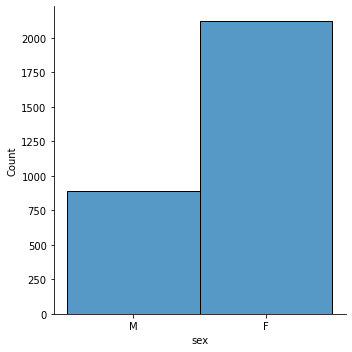

In [39]:
# Histogram of the sex in the hypothyroidism dataset
sns.displot(data=hypo['sex'])

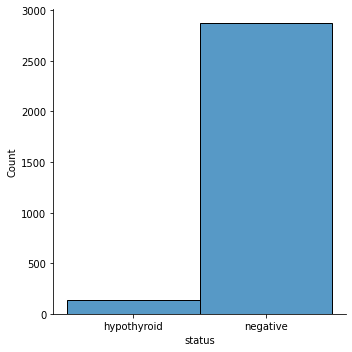

In [40]:
# Histogram of the total count of people with hypothyroidism
sns.displot(hypo['status'])

From the above categorical analysis, we can conclude: 
- Majority of the patients in our dataset are female.
- Majority of the patients tested negative for hypothyroidism. 

### 5.1.2 Numerical Variables

> #### i) Measures of Central Tendency

In [25]:
# Mean
hypo[numerical_variables].mean()

age     50.328144
fti    115.477144
t3       1.856111
t4u      0.974966
tsh      7.222276
tt4    108.380482
dtype: float64

In [26]:
# Median 
hypo[numerical_variables].median()

age     48.000000
fti    109.000000
t3       1.600000
t4u      0.950000
tsh      5.076161
tt4    102.749884
dtype: float64

In [27]:
# Mode
hypo[numerical_variables].mode()

,age,fti,t3,t4u,tsh,tt4
0,44.077383,109.237097,1.545135,0.924314,5.076161,102.749884


> #### ii) Measures of Dispersion

In [23]:
# Standard Deviation
hypo[numerical_variables].std()

age    18.047637
fti    58.173722
t3      0.888647
t4u     0.219174
tsh    22.191743
tt4    43.388058
dtype: float64

In [29]:
# Range
max = hypo[numerical_variables].max()
min = hypo[numerical_variables].min()
range = max - min
range

age     97.00
fti    879.60
t3      10.15
t4u      2.01
tsh    529.99
tt4    448.00
dtype: float64

In [33]:
# Quantiles
hypo[numerical_variables].quantile([0.25,0.5,0.75])

,age,fti,t3,t4u,tsh,tt4
0.25,38.0,92.0,1.5,0.86,1.200000,85.000000
0.50,48.0,109.0,1.6,0.95,5.076161,102.749884
0.75,64.0,126.0,2.2,1.06,5.076161,125.000000


In [34]:
# Variance
hypo[numerical_variables].var()

age     325.717218
fti    3384.181982
t3        0.789694
t4u       0.048037
tsh     492.473443
tt4    1882.523605
dtype: float64

> #### iii) Visualization Techniques

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


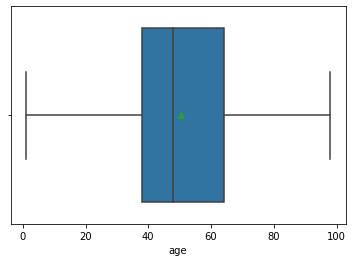

In [36]:
# Checking for outliers in the numerical columns
# Age
sns.boxplot(hypo['age'], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


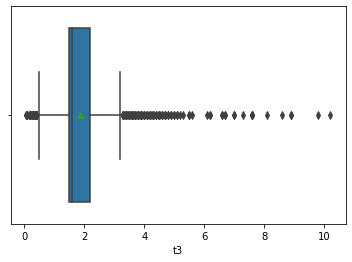

In [37]:
# Checking for outliers in the t3 hormone column
sns.boxplot(hypo['t3'], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


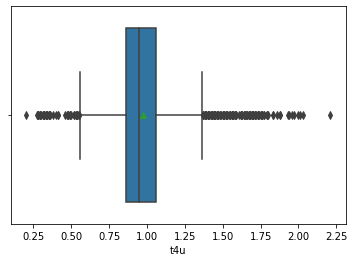

In [38]:
# Checking for outliers in the t4u column
sns.boxplot(hypo['t4u'], showmeans=True)

Using boxplots, we can conclude that there are outliers in our numerical columns but it would be irresponsible to drop them because it will distort our data and tamper with our analysis and predictions.

# 6.0 Implementing the Solution

## 6.1 Decision Trees

> ### i) Random Forest Tree

In [ ]:
# First we can convert our categorical variables to numerical using the get_dummies function
categorical = hypo[['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','tsh_measured','t3_measured','tt4_measured','t4u_measured','fti_measured']]

hypo = pd.get_dummies(hypo, columns=['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre','tsh_measured','t3_measured','tt4_measured','t4u_measured','fti_measured'])

In [ ]:
# We define the x and y variables and store the features in a list for visualization purposes
test_features = hypo.columns.to_list()
test_features.remove('status')

X = hypo[test_features].values
y = hypo['status']

In [ ]:
from sklearn.model_selection import train_test_split

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers so we use 42
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)

In [ ]:
# We then create a comparison dataframe to compare the actual and predicted variables
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame.describe()

,Actual,Predicted
count,904,904
unique,2,2
top,negative,negative
freq,869,877


In [ ]:
# We then use the confusion matrix to compare the number of correct predictions done by our model
from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(y_test, y_pred)
confusion

# We can determine that the random forest classifier was able to make (27+869) 
# 896 correct predictions out of 904 total which is quite accurate

array([[ 27,   8],
       [  0, 869]])

In [ ]:
# We can also determine the model's prediction accuracy using the accuracy score metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("The accuracy of our random forest classifier is: ", accuracy*100)

The accuracy of our random forest classifier is:  99.11504424778761


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


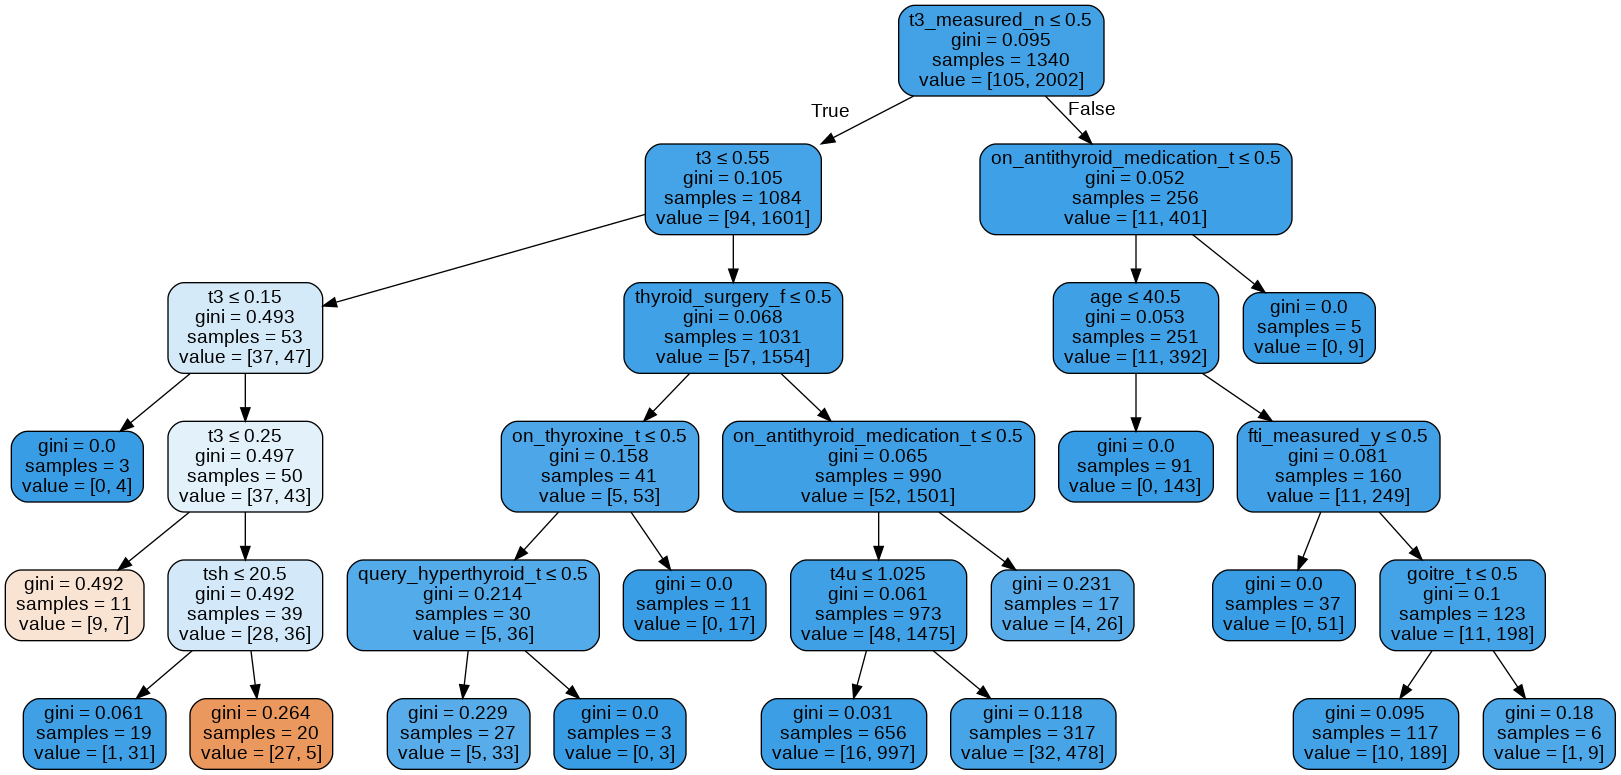

In [ ]:
# We can then go ahead and visualize an individual tree within our forest
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# Pick a specific tree from the forest
tree = forest.estimators_[45]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

- From the visual, we can tell that the first test was done on the measured T3 hormone which makes sense since T3 tests are used to determine the severity of the hypothyroidism.

- Another important thing to note is that RF classifiers can be used to visualize feature importance which simply means showing us the features which carry the most weight in helping us predict the target variable. 

In [ ]:
# Feature importance
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
# round(importance, 2) simply means rounding off the importance to 2 decimal places
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('tsh', 0.4), ('t3', 0.53), ('tt4', 0.0), ('t4u', 0.03), ('fti', 0.0), ('sex_0', 0.0), ('sex_F', 0.0), ('sex_M', 0.0), ('on_thyroxine_f', 0.0), ('on_thyroxine_t', 0.01), ('query_on_thyroxine_f', 0.0), ('query_on_thyroxine_t', 0.0), ('on_antithyroid_medication_f', 0.0), ('on_antithyroid_medication_t', 0.01), ('thyroid_surgery_f', 0.01), ('thyroid_surgery_t', 0.0), ('query_hypothyroid_f', 0.0), ('query_hypothyroid_t', 0.0), ('query_hyperthyroid_f', 0.0), ('query_hyperthyroid_t', 0.0), ('pregnant_f', 0.0), ('pregnant_t', 0.0), ('sick_f', 0.0), ('sick_t', 0.0), ('tumor_f', 0.0), ('tumor_t', 0.0), ('lithium_f', 0.0), ('lithium_t', 0.0), ('goitre_f', 0.0), ('goitre_t', 0.0), ('tsh_measured_n', 0.0), ('tsh_measured_y', 0.0), ('t3_measured_n', 0.01), ('t3_measured_y', 0.0), ('tt4_measured_n', 0.0), ('tt4_measured_y', 0.0), ('t4u_measured_n', 0.0), ('t4u_measured_y', 0.0), ('fti_measured_n', 0.0), ('fti_measured_y', 0.0)]

Variable: t3                   Importance: 0.53
Variable

Since we're trying to predict whether a patient has hypothyroidism or not, the only important features we need are : 
- T3 
- TSH
- T4U

Other features include : age, on_thyroxine, on_antithyroid_medication, thyroid_surgery and t3_measured. 


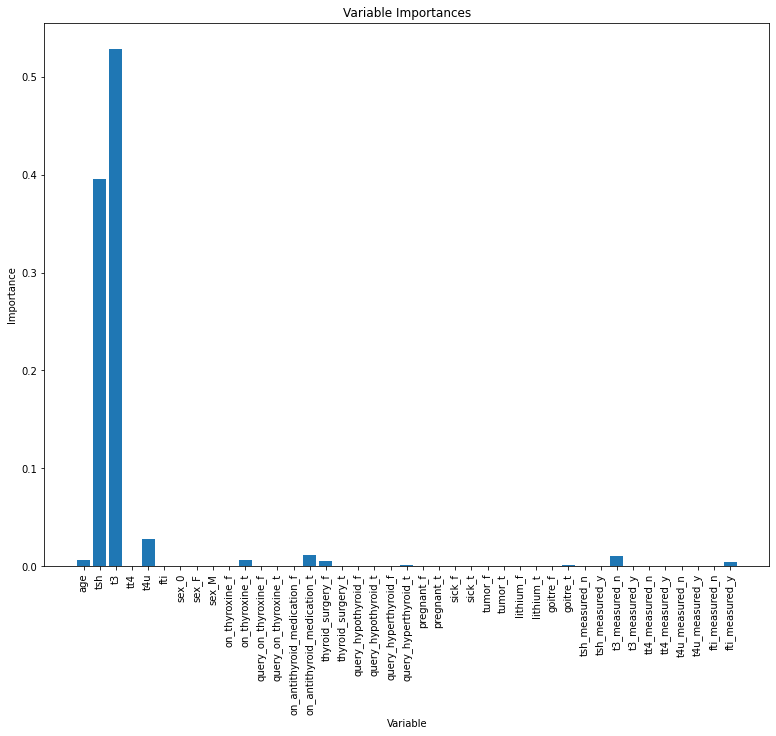

In [ ]:
# Import matplotlib for plotting the feature importance
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize = (13,10))
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Hyperparameter Tuning

In [42]:
# Define the x variable using only the most important features
X = hypo[['t3','tsh','t4u']].values
y = hypo['status']

from sklearn.model_selection import train_test_split

# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
# Import the model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred1 = forest.predict(X_test)

In [46]:
# We then use the confusion matrix to compare the number of correct predictions done by our model
from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(y_test, y_pred1)
confusion

array([[ 22,  13],
       [  7, 862]])

In [48]:
# We can also determine the model's prediction accuracy using the accuracy score metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred1)
print("The accuracy of our updated random forest classifier is: ", accuracy*100)

The accuracy of our updated random forest classifier is:  97.78761061946902


Conclusion 

After using only the important features; t3, t4u and tsh, we achieved a lower accuracy as compared to the original random forest classifier which can only mean that we need all the other features in our dataset in order to achieve a high prediction accuracy. 

> ### ii) AdaBoost Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a decision tree classifier, we will set its max_depth to 5
tree = DecisionTreeClassifier(max_depth=5)

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_tree = tree.predict(X)

In [ ]:
#from sklearn.ensemble import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Adaboost needs a simple decision tree in its constructor. 
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=300, random_state=42)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)


In [ ]:
# We then use the confusion matrix to compare the number of correct predictions done by our model
from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(y_test, y_pred_ada)
confusion

array([[ 23,   2],
       [  2, 576]])

In [ ]:
# We can also determine the model's prediction accuracy using the accuracy score metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_ada)
print("The accuracy of our AdaBoost classifier is: ", accuracy*100)

The accuracy of our AdaBoost classifier is:  99.33665008291874


## 6.2 Support Vector Machines

> ### i) Linear SVC 

In [ ]:
# Import the SVC and the linearSVC from the sklearn.svm library
from sklearn.svm import SVC,LinearSVC

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


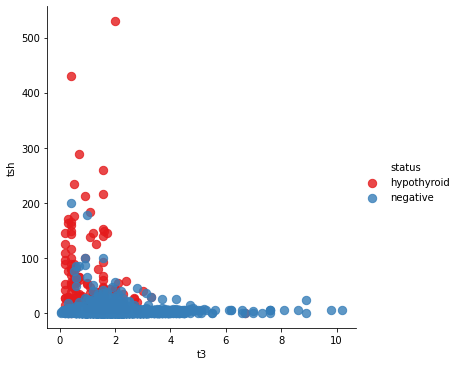

In [ ]:
# We plot a graph using the most important features to spot if we can use SVM for classification purposes
sns.lmplot('t3', 'tsh', data=hypo, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [ ]:
# We define the x and y variables and store the features in a list for visualization purposes
test_features = hypo.columns.to_list()
test_features.remove('status')

X = hypo[test_features].values
y = hypo['status']

In [ ]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Fit the model
linear = SVC(kernel= 'linear')
linear.fit(X_train,y_train)

# Predict the response for the test set
y_pred_linear = linear.predict(X_test)

In [ ]:
# Checking the number of correct prediction using the confusion matrix

print(confusion_matrix(y_test, y_pred_linear))

[[ 19   6]
 [  3 575]]


In [ ]:
# Accuracy score of the linear SVC model
print('The accuracy score of the linear SVC model is :', accuracy_score(y_test,y_pred_linear)*100)


The accuracy score of the linear SVC model is : 98.50746268656717


> ### ii) Polynomial SVC

In [ ]:
# Building the model 
poly = SVC(kernel='poly', degree=5, gamma='scale')
# Training the model using the training set
poly.fit(X_train, y_train)

# Predicting the status using the polynomial function
y_pred_poly = poly.predict(X_test)

In [ ]:
# Checking the number of correct prediction using the confusion matrix

print(confusion_matrix(y_test, y_pred_poly))

[[  3  22]
 [  1 577]]


In [ ]:
# Accuracy score of the polynomial SVC
print('The accuracy score of the polynomial SVC model is :', accuracy_score(y_test,y_pred_poly)*100)


The accuracy score of the polynomial SVC model is : 96.18573797678275


> ### iii) Radial Basis Function

In [ ]:
# Build the model
rbf = SVC(kernel='rbf', degree=5)
# Training the model using the training set
rbf.fit(X_train, y_train)

y_pred_rbf = rbf.predict(X_test)

In [ ]:
# Checking the number of correct prediction using the confusion matrix

print(confusion_matrix(y_test, y_pred_rbf))

[[ 18   7]
 [  3 575]]


In [ ]:
# Accuracy score OF THE rbf SVC
print('The accuracy score of the rbf SVC model is :', accuracy_score(y_test,y_pred_rbf)*100)


The accuracy score of the rbf SVC model is : 98.34162520729684


Conclusion 

- After analyzing all our support vector machines, we established that the linear SVC gave us the highest accuracy score as compared to the other support vector classifiers followed by the radial basis function SVC. 
- This could go to show that our target data is not polynomial thus using the polynomial SVC would be wrong since it gave us the lowest accuracy score of 96.18% as compared to the other SVC models. 


# 7.0 Challenging the Solution

- Considering we did use random forest classifier and ada boost classifier as our decision trees, we could challenge the solution using the gradient boosted classifier and compare their accuracies. 

> ## Gradient Boosted Tree

In [ ]:
# Using the Gradient Boosted Classifier
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 300

gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.01, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

In [ ]:
# We then use the confusion matrix to compare the number of correct predictions done by our model
from sklearn.metrics import confusion_matrix 
confusion = confusion_matrix(y_test, y_pred_gbr)
confusion

array([[ 23,   2],
       [  1, 577]])

In [ ]:
# We can also determine the model's prediction accuracy using the accuracy score metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_gbr)
print("The accuracy of our GradientBoosted classifier is: ", accuracy*100)

The accuracy of our GradientBoosted classifier is:  99.50248756218906


- We can conclude that after setting our learning rate to 0.01, we achieve the highest accuracy score of 99.50% as compared to the other decision trees.

# 8.0 Recommendations

- When it comes to predicting whether a patient has hypothyroidism or not, we recommend that we use the gradient boosted classifier since it gave us the highest accuracy as compared to all the other decision trees and also the Support Vector Machines. 
- To achieve the highest prediction accuracy using the gradient boosted classifier, we recommend setting the learning rate to 0.01 and the maximum tree depth to 2. 